In [ ]:
!pip install bing_image_downloader

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


# Import LIB

In [ ]:
#from bing_image_downloader import downloader #download images
import os #play around Folder
import numpy as np #mathematical operation
from skimage.io import imread #image read
from skimage.transform import resize #to resize the Image
from sklearn import svm #train model
from sklearn.model_selection import GridSearchCV #GridSearchCV
from sklearn.model_selection import train_test_split # model split
from sklearn.metrics import accuracy_score, confusion_matrix # accuracy_score, confussion metrix
import pickle #save model
import matplotlib.pyplot as plt #show output

# Gathering Data

In [ ]:
#downloader.download('lion image with white background',limit=100, output_dir='/content/images',adult_filter_off=True)

In [ ]:
#downloader.download('cat images with white background', limit=100, output_dir='/content/images',adult_filter_off=True)

In [ ]:
#downloader.download('dog images with white background',limit=100,output_dir='/content/images',adult_filter_off=True)

In [ ]:
#downloader.download('fish images with white background',limit=100,output_dir='/content/images',adult_filter_off=True)

# Data Preprocessing

In [ ]:
output = []
target = []
flat_data = []

DATADIR = '/content/drive/MyDrive/ML/Renkube/AnimalClassification/Images'
CATEGORY = ['lion image with white background','cat images with white background','dog images with white background','fish images with white background']

for category in CATEGORY:
  label_num = CATEGORY.index(category)
  path = os.path.join(DATADIR, category)

  for img in os.listdir(path):
    imgArray = imread(os.path.join(path, img)) # read image
    resized_image = resize(imgArray,(150,150,3)) #resize image
    flat_data.append(resized_image.flatten()) #flatten image
    target.append(label_num)
    output.append(resized_image)

#convert to array
flat_data = np.array(flat_data)
output = np.array(output)
target = np.array(target)

# Split Model

In [ ]:
# Test train model split
X_train , X_test, y_train, y_test = train_test_split(flat_data,target, test_size=0.3, random_state = 0)

# Finding best Algo

In [ ]:
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)

# Train model

In [ ]:
# train modl
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

# Test model and finding Accurcy & Cunfussion matric

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([2, 3, 2, 1, 2, 0, 2, 0, 1, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 0, 2, 2,
       2, 3, 3, 2, 3, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 3, 2, 2, 2, 0,
       2, 0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 3, 3, 2, 1, 0, 1, 3, 0,
       1, 0, 1, 2, 0, 3, 1, 2, 1, 2, 3, 2, 2, 2, 0, 3, 0, 2, 2, 2, 3, 3,
       3, 2, 2, 2, 0, 0, 0, 1, 2, 3, 2, 3, 3, 0, 3, 1, 2, 2, 0, 3, 1, 0,
       0, 0, 2, 0, 3, 2, 2, 2, 2, 1])

In [ ]:
accuracy_score(y_pred,y_test)

0.5

In [ ]:
confusion_matrix(y_pred, y_test)

array([[18,  4,  2,  2],
       [ 2, 10,  1,  3],
       [ 6, 13, 20, 14],
       [ 7,  3,  3, 12]])

# Save model & Load Model

In [ ]:
pickle.dump(clf, open('img_model.p','wb'))

In [ ]:
#load model
model = pickle.load(open('/content/drive/MyDrive/ML/Renkube/AnimalClassification/img_model.p','rb'))

# Test new cases

Enter Your URl:https://media.istockphoto.com/photos/golden-retriever-smiling-picture-id598165430?k=6&m=598165430&s=612x612&w=0&h=lojcW2vQRspvyyt8mLmH5wIufbrJFsmH8Vdq2lTs75U=
Predicted Output: dog images with white background


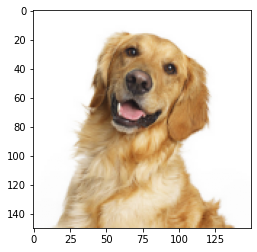

In [ ]:
flat_data = []
CATEGORY = ['lion image with white background','cat images with white background','dog images with white background','fish images with white background']

url = input('Enter Your URl:')
URL = imread(url)

resized_img = resize(URL, (150,150,3)) #resize
flat_data.append(resized_img.flatten()) #flatten

flat_data = np.array(flat_data) #array

plt.imshow(resized_img)

y_out = model.predict(flat_data)
y_out = CATEGORY[y_out[0]]

print(f'Predicted Output: {y_out}')

In [ ]:
# lion: https://th.bing.com/th/id/R.b992f80a337fe6217ac00c92acf14b4f?rik=ruzaEB05%2bgqXqQ&riu=http%3a%2f%2fwallpapercave.com%2fwp%2fI1FwiEZ.png&ehk=IqTnozEUa%2b9E0%2fTvVjuIdRKB2q3CftEgidsJ0gXZGeA%3d&risl=&pid=ImgRaw&r=0
# dog: https://media.istockphoto.com/photos/golden-retriever-smiling-picture-id598165430?k=6&m=598165430&s=612x612&w=0&h=lojcW2vQRspvyyt8mLmH5wIufbrJFsmH8Vdq2lTs75U=
# fish : https://th.bing.com/th/id/OIP.gT0LtYqerxCacrAZxyzoYwHaFf?w=205&h=180&c=7&r=0&o=5&pid=1.7
# cat: https://th.bing.com/th/id/OIP.RdEgeUSvl5xNBVEvy8-KEgHaH-?w=179&h=193&c=7&r=0&o=5&pid=1.7